In [2]:
import pandas as pd


In [ ]:
# load oxygen and nitrate datasets
oxygen_df = pd.read_csv('Oxygen_Demand.csv', sep=';')
nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';')



# Convert Sample.Date into Year column
oxygen_df['Year'] = pd.to_datetime(oxygen_df['Sample.Date']).dt.year
nitrate_df['Year'] = pd.to_datetime(nitrate_df['Sample.Date']).dt.year



/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_9047/1156166777.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  oxygen_df = pd.read_csv('Oxygen_Demand.csv', sep=';')
/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_9047/1156166777.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';')


In [ ]:
# merge with station metadata to get 'Country Name'
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')

# Merge oxygen data
oxygen_df = pd.merge(oxygen_df, station_metadata[['GEMS Station Number', 'Country Name']], how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')

# Merge nitrate data
nitrate_df = pd.merge(nitrate_df, station_metadata[['GEMS Station Number', 'Country Name']], how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')


In [5]:
# Group by Country Name and Year and calculate mean
oxygen_avg = oxygen_df.groupby(['Country Name', 'Year'])['Value'].mean().reset_index()
nitrate_avg = nitrate_df.groupby(['Country Name', 'Year'])['Value'].mean().reset_index()


In [6]:
# Merge both averages on Country and Year
merged_df = pd.merge(oxygen_avg, nitrate_avg, on=['Country Name', 'Year'], suffixes=('_oxygen', '_nitrate'))

# Preview
print(merged_df.head())


  Country Name  Year  Value_oxygen  Value_nitrate
0    Argentina  2011     14.000000       1.865000
1    Argentina  2012      3.625000       1.928750
2    Argentina  2013      8.875000       1.645000
3    Argentina  2021      9.000000       0.657443
4      Austria  2014      2.037671       3.376383


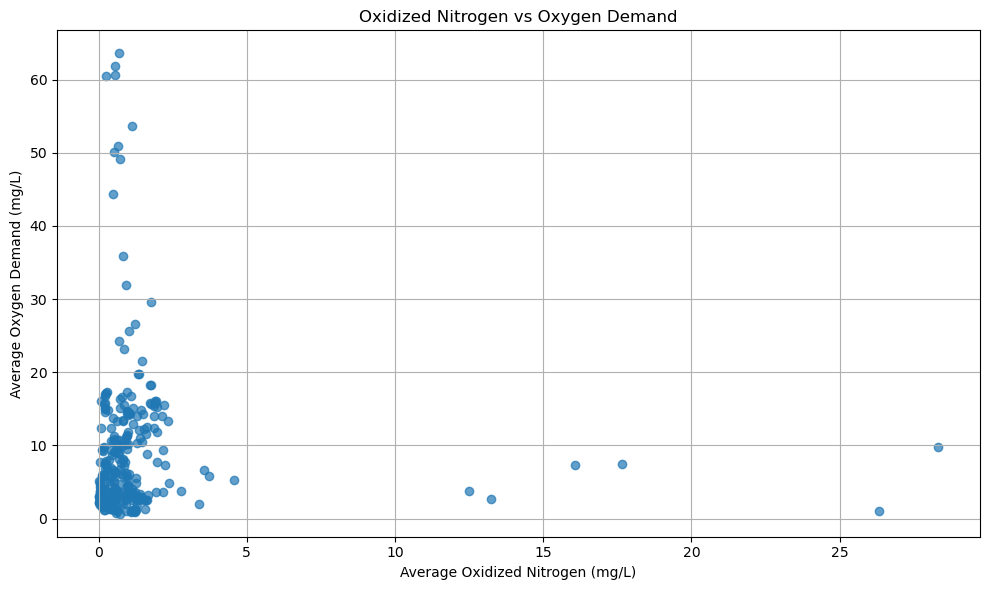

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.7)
plt.title('Oxidized Nitrogen vs Oxygen Demand')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()


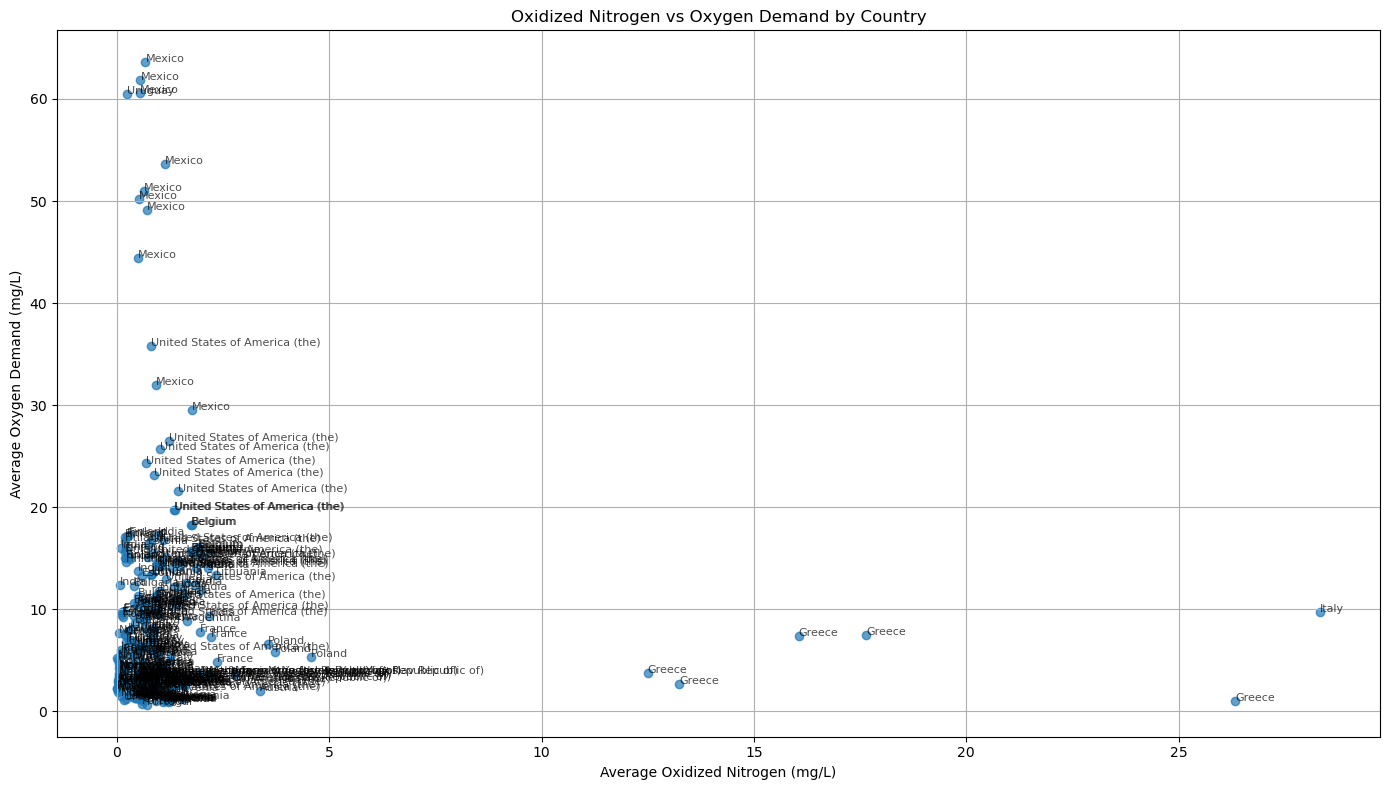

In [10]:
plt.figure(figsize=(14, 8))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.7)

# Add country labels to each point
for i in range(len(merged_df)):
    plt.text(merged_df['Value_nitrate'][i], merged_df['Value_oxygen'][i], merged_df['Country Name'][i], fontsize=8, alpha=0.7)

plt.title('Oxidized Nitrogen vs Oxygen Demand by Country')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()

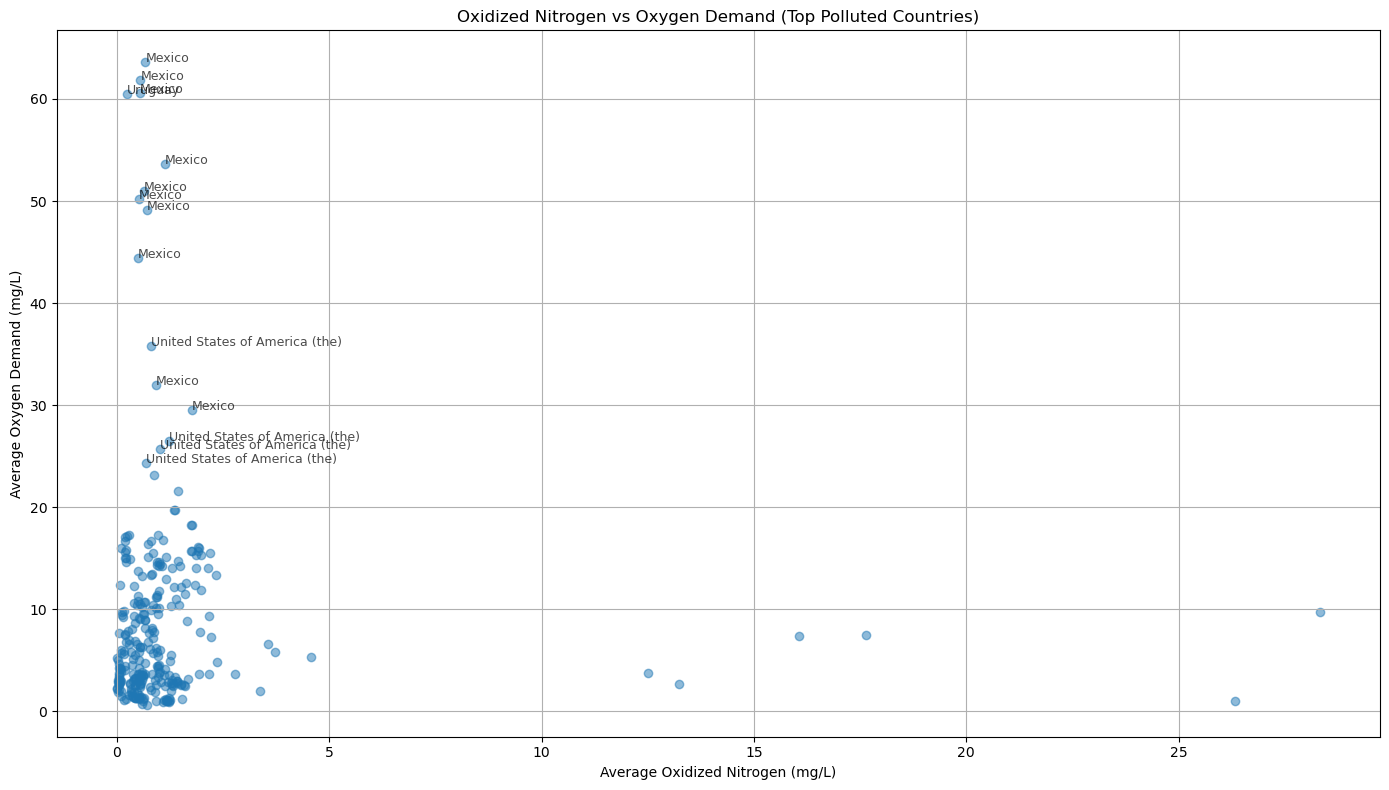

In [ ]:
import matplotlib.pyplot as plt

# Only select top 15 countries by oxygen demand 
top_polluted = merged_df.sort_values(by='Value_oxygen', ascending=False).head(15)

plt.figure(figsize=(14, 8))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.5)

# Label only the top polluted countries
for i in range(len(top_polluted)):
    plt.text(top_polluted['Value_nitrate'].iloc[i],
             top_polluted['Value_oxygen'].iloc[i],
             top_polluted['Country Name'].iloc[i],
             fontsize=9, alpha=0.7)

plt.title('Oxidized Nitrogen vs Oxygen Demand (Top Polluted Countries)')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()


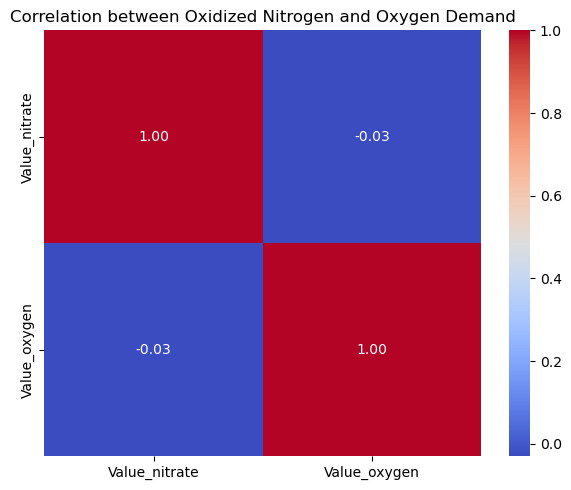

In [11]:
import seaborn as sns

# Create a smaller DataFrame just for correlation
corr_data = merged_df[['Value_nitrate', 'Value_oxygen']]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Oxidized Nitrogen and Oxygen Demand')
plt.tight_layout()
plt.show()
